## __Sentiment Analysis__

### _Importing Libraries_

In [1]:
import numpy as np      # Linear Algebra
import pandas as pd     # Data manipulation and processing
pd.options.mode.chained_assignment = None

from wordcloud import WordCloud  # Word visualization
import matplotlib.pyplot as plt   # Plotting properties
import seaborn as sns       # Plotting Properties
from sklearn.feature_extraction.text import CountVectorizer  # Data transformation
from sklearn.model_selection import train_test_split  # Data Testing
from sklearn.linear_model import LogisticRegression   # Prediction model
from sklearn.metrics import accuracy_score    # Comparison between actual and predicted
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder  # Variable encoding and decoding for XGBoost
import re    # Regular Expressions
import nltk
from nltk import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Validation dataset
val = pd.read_csv("E:\\PRODIGY INFOTECH\\CSV_FILES\\twitter_validation.csv", header = None)

# Full dataset for Train-Test
train = pd.read_csv("E:\\PRODIGY INFOTECH\\CSV_FILES\\twitter_training.csv", header = None)

In [3]:
train.columns = ['id', 'information', 'type', 'text']
train.head()

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
val.columns = ['id', 'information', 'type', 'text']
val.head()

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [5]:
train_data = train
train_data

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [6]:
val_data = val
val_data

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [7]:
# Text transformation
train_data["lower"] = train_data.text.str.lower()   # lowercase
train_data["lower"] = [str(data) for data in train_data.lower]  # converting all to string
train_data["lower"] = train_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9]+', ' ', x))  # regex
val_data["lower"] = val_data.text.str.lower()  # lowercase
val_data["lower"] = [str(data) for data in val_data.lower]   # Converting all to string
val_data["lower"] = val_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9]+', ' ', x))   #regex

In [8]:
train_data.head()

,id,information,type,text,lower
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


### _Feature Plotting_

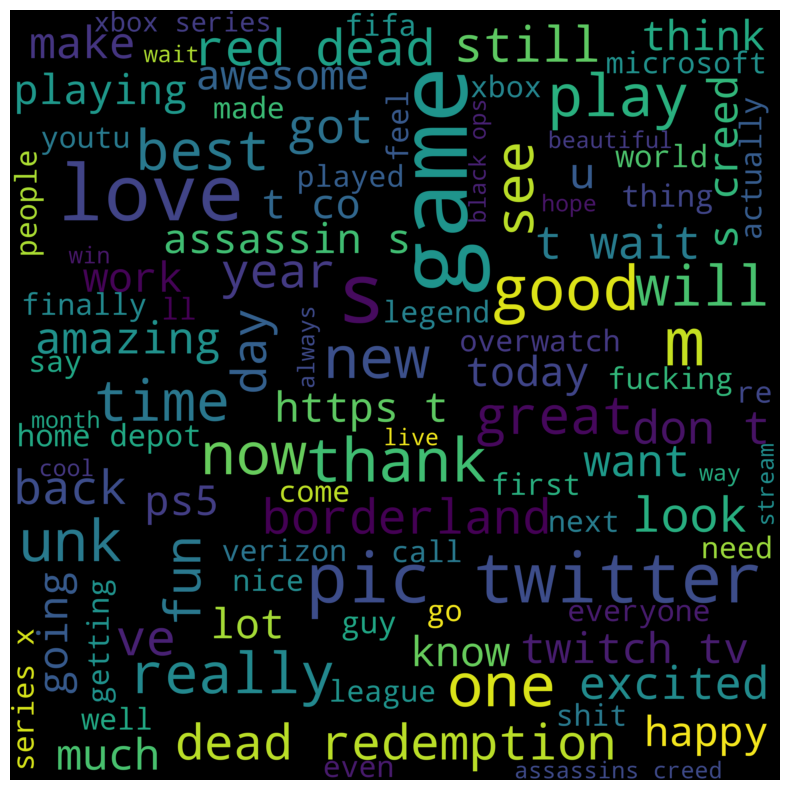

In [9]:
word_cloud_text = ''.join(train_data[train_data["type"] == "Positive"].lower)

# Creation of wordcloud
wordcloud = WordCloud(
     max_font_size = 100,
     max_words = 100,
     background_color = "black",
     scale = 10,
     width = 800,
     height = 800
).generate(word_cloud_text)

# Figure properties
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

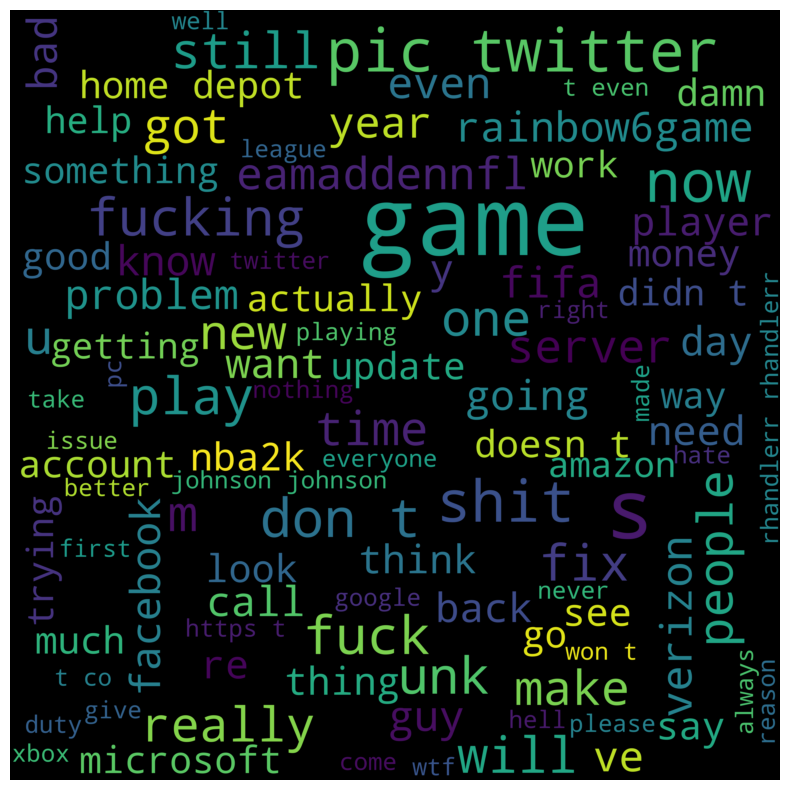

In [10]:
word_cloud_text = ''.join(train_data[train_data["type"] == "Negative"].lower)

# Creation of wordcloud
wordcloud = WordCloud(
     max_font_size = 100,
     max_words = 100,
     background_color = "black",
     scale = 10,
     width = 800,
     height = 800
).generate(word_cloud_text)

# Figure properties
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

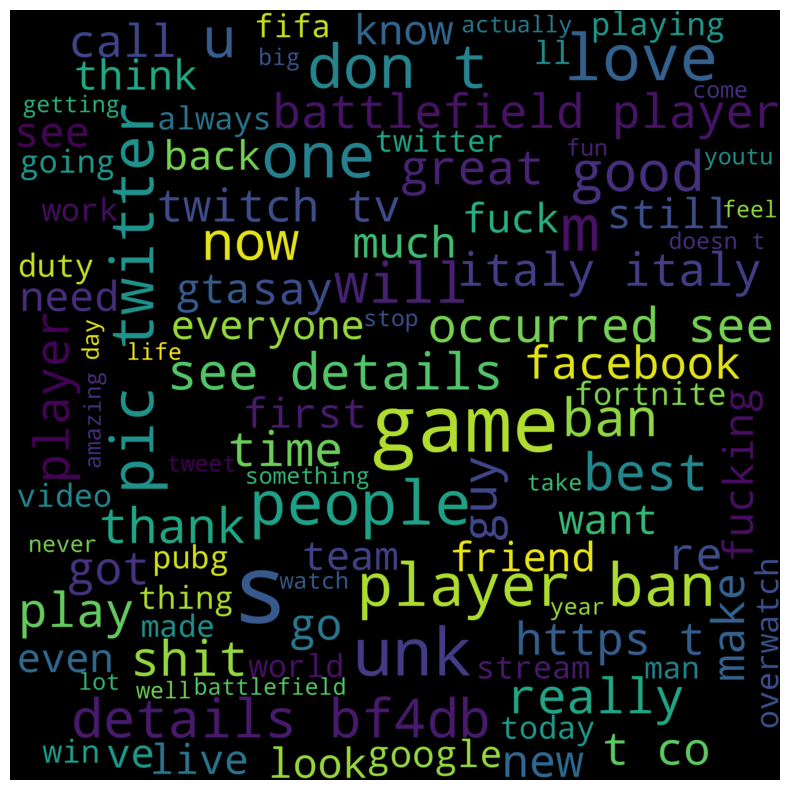

In [11]:
word_cloud_text = ''.join(train_data[train_data["type"] == "Irrelevant"].lower)

# Creation of wordcloud
wordcloud = WordCloud(
     max_font_size = 100,
     max_words = 100, 
     background_color = "black",
     scale = 10,
     width = 800,
     height = 800
).generate(word_cloud_text)

# Figure properties
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

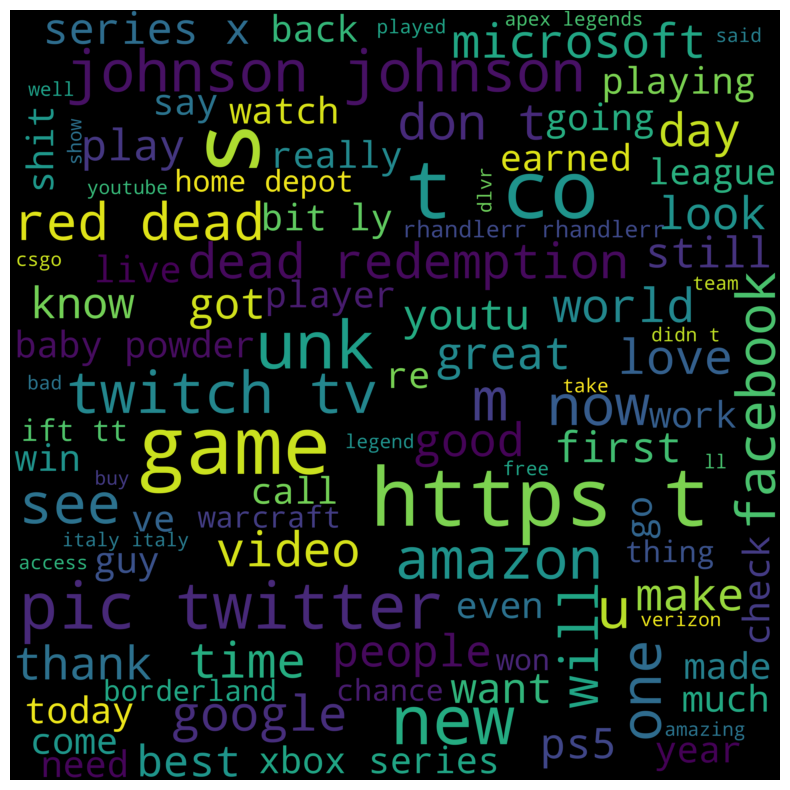

In [12]:
word_cloud_text = ''.join(train_data[train_data["type"] == 'Neutral'].lower)

# Creating wordcloud
wordcloud = WordCloud(
    max_font_size = 100,
    max_words = 100,
    background_color = "black",
    scale = 10,
    width = 800,
    height = 800
).generate(word_cloud_text)

# Figure properties
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [13]:
# Count information per category
plot1 = train.groupby(by = ["information", "type"]).count().reset_index()
plot1.head()

,information,type,id,text,lower
0,Amazon,Irrelevant,192,186,192
1,Amazon,Negative,576,575,576
2,Amazon,Neutral,1236,1207,1236
3,Amazon,Positive,312,308,312
4,ApexLegends,Irrelevant,192,192,192


Text(0.5, 1.0, 'Distribution of Tweets per Branch and Type')

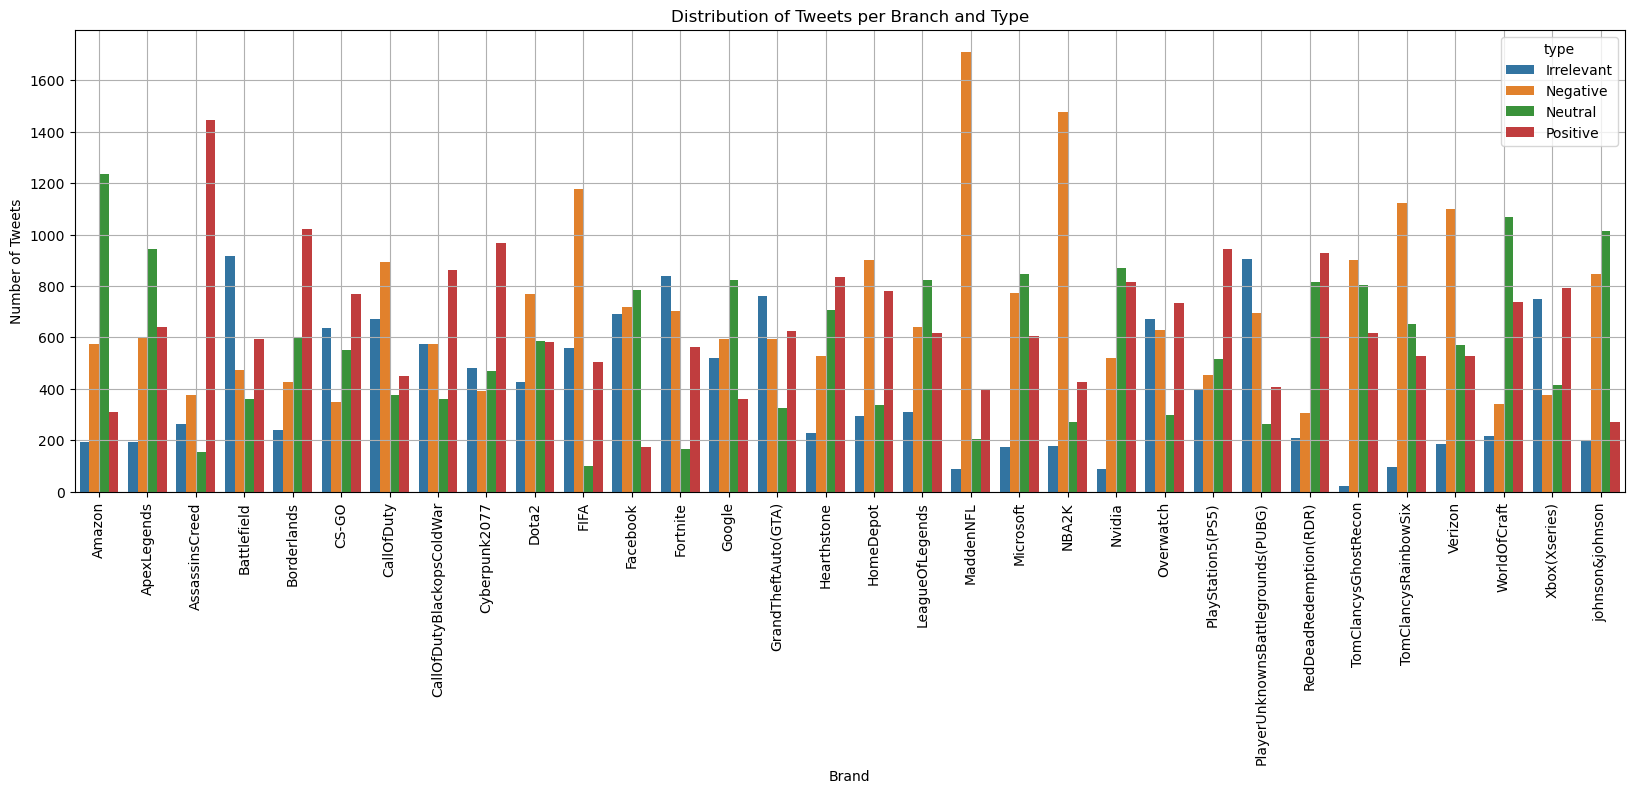

In [14]:
# Figure of comparison per branch
plt.figure(figsize = (20, 6))
sns.barplot(data = plot1, x = "information", y = "id", hue = "type")
plt.xticks(rotation = 90)
plt.xlabel("Brand")
plt.ylabel("Number of Tweets")
plt.grid()
plt.title("Distribution of Tweets per Branch and Type")

### _Text Analysis_

In [15]:
# Text Splitting
tokens_text = [word_tokenize(str(word)) for word in train_data.lower]

# Unique word counter
tokens_counter = [item for sublist in tokens_text for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))

Number of tokens:  30436


In [16]:
tokens_text[1]

['i',
 'am',
 'coming',
 'to',
 'the',
 'borders',
 'and',
 'i',
 'will',
 'kill',
 'you',
 'all']

In [17]:
# Choosing English stopwords
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

### _Logistic Regression Model_

In [18]:
# Initial Bag of Words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words,        # English Stopwords
    ngram_range=(1, 1)            # Analysis of one word
)

In [19]:
# Train-Test Splitting
reviews_train, reviews_test = train_test_split(train_data, test_size=0.2, random_state=0)

In [20]:
# Creation of encoding related to train dataset
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
# Transformation of test dataset with train encoding
X_test_bow = bow_counts.transform(reviews_test.lower)

E:\AnacondaNavigator\Lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [21]:
X_test_bow

<14937x28993 sparse matrix of type '<class 'numpy.int64'>'
	with 161222 stored elements in Compressed Sparse Row format>

In [22]:
# Labels for train and test encoding
y_train_bow = reviews_train['type']
y_test_bow = reviews_test['type']

In [23]:
# Total of registers per category
y_test_bow.value_counts() / y_test_bow.shape[0]

Negative      0.299190
Positive      0.282252
Neutral       0.245632
Irrelevant    0.172926
Name: type, dtype: float64

In [24]:
# Logistic regression
model1 = LogisticRegression(C=1, solver="liblinear",max_iter=200)
model1.fit(X_train_bow, y_train_bow)
# Prediction
test_pred = model1.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)

Accuracy:  81.50900448550578


E:\AnacondaNavigator\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [25]:
# Validation data
X_val_bow = bow_counts.transform(val_data.lower)
y_val_bow = val_data['type']

In [26]:
X_val_bow

<1000x28993 sparse matrix of type '<class 'numpy.int64'>'
	with 12913 stored elements in Compressed Sparse Row format>

In [27]:
Val_res = model1.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_res) * 100)

Accuracy:  91.7


In [28]:
# n-gram of 4 words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    ngram_range=(1,4)
)
# Data labeling
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
X_test_bow = bow_counts.transform(reviews_test.lower)
X_val_bow = bow_counts.transform(val_data.lower)

In [29]:
X_train_bow

<59745x1427378 sparse matrix of type '<class 'numpy.int64'>'
	with 4142213 stored elements in Compressed Sparse Row format>

In [30]:
model2 = LogisticRegression(C=0.9, solver="liblinear",max_iter=1500)
# Logistic regression
model2.fit(X_train_bow, y_train_bow)
# Prediction
test_pred_2 = model2.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_2) * 100)

Accuracy:  90.79467095132891


In [31]:
y_val_bow = val_data['type']
Val_pred_2 = model2.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_pred_2) * 100)

Accuracy:  98.6


In [36]:
# https://stackoverflow.com/questions/71996617/invalid-classes-inferred-from-unique-values-of-y-expected-0-1-2-3-4-5-got
le = LabelEncoder()
y_train_bow_num = le.fit_transform(y_train_bow)
y_test_bow_num=le.transform(y_test_bow)
y_val_bow_num=le.transform(y_val_bow)

In [ ]:
%%time
XGB=XGBClassifier(objective="multi:softmax",n_estimators=1000,colsample_bytree=0.6, subsample=0.6)
XGB.fit(X_train_bow, y_train_bow_num)
# Prediction
test_pred_2 = XGB.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow_num, test_pred_2) * 100)

In [ ]:
y_val_bow = val_data['type']
Val_pred_2 = XGB.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow_num, Val_pred_2) * 100)

In [ ]:
test_pred_N = XGB.predict(X_train_bow)
print("Accuracy: ", accuracy_score(y_train_bow_num, test_pred_N) * 100)